# Success Rates of Various Sparse Recovery Algorithms

This notebook presents a comparative study of success rates of various sparse recovery algorithms which solve the inverse problem  $y=\Phi x$. The variation of success rate of sparse recovery against the sparsity level is studied.

Each problem consists of randomly sampled:

* Gaussian sensing matrices $\Phi$
* Sparse representations with Gaussian non-zero entries $x$


The size or sensing matrices is $M \times N$ which is fixed at $M = 200$ and $N = 1000$.  

The sparsity level of sparse representations is denoted by $K$ and it varies from $K=2$ to $K=100$.
Thus, there are 42 different values of $K$.

For each value of $K$, 500 trials are done. The trials are grouped into sizes of 20. For each trial group, a separate
sensing matrix is sampled. For each trial, a separate sparse vector is sampled with $K$ non-zero Gaussian entries. In other words, there are 25 different Gaussian sensing matrices and 20 different sparse vectors for each dictionary comprising 500 trials for a particular value of $K$.

The measurement vector $y = \Phi x$ is computed for each trial and fed to the solver (recovery algorithm) along with the dictionary $\Phi$ and the sparsity level $K$. The measurements are noiseless (subject to floating point accuracy). 

Sparse recovery is said to be successful if it correctly identifies the non-zero entry locations of the sparse vector $x$. In some trials, some of the non-zero entries in $x$ are extremely small (as they are sampled from Gaussian distribution). 
Corresponding atoms from $\Phi$ may not be correctly identified.
If the recovery SNR is greater than 30 dB and more than 75% atoms have been correctly identified, we consider it as a successful recovery. 

All solvers have been implemented with 32-bit floating point accuracy.

Following solvers/recovery algorithms are included in the study:

* Iterative Hard Thresholding (IHT)
* Normalized Iterative Hard Thresholding (NIHT)
* Hard Thresholding Pursuit (HTP)
* Normalized Hard Thresholding Pursuit (NHTP)
* Subspace Pursuit (SP)
* Compressive Sampling Matching Pursuit (CoSaMP)

The raw data from the study has been stored in a CSV file. This notebook reads this CSV file and presents the results in graphical format. First, success rate variation for each method is plotted separately. Finally, a common plot is presented to compare the success rate variations of all the methods.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

###### Read the raw data CSV

In [3]:
df = pd.read_csv('2021_06_10/records_recovery_comparison.csv')

In [4]:
df.sample(15)

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
109,HTP,200,1000,48,500,347,153,0.694,8,24,14.514,43.870754,87.917342
152,NHTP,200,1000,50,500,423,77,0.846,7,20,12.012,33.919539,67.975028
243,CoSaMP,200,1000,68,500,0,500,0.000,200,200,200.000,847.692297,1698.782159
251,CoSaMP,200,1000,100,500,0,500,0.000,200,200,200.000,1063.903356,2132.070853
242,CoSaMP,200,1000,64,500,0,500,0.000,200,200,200.000,805.684043,1614.597281
62,NIHT,200,1000,38,500,500,0,1.000,23,162,32.400,26.383729,52.873205
64,NIHT,200,1000,42,500,493,7,0.986,27,200,40.228,27.963177,56.038431
41,IHT,200,1000,100,500,0,500,0.000,200,200,200.000,84.691720,169.722885
210,CoSaMP,200,1000,1,500,500,0,1.000,1,1,1.000,20.500777,41.083722
96,HTP,200,1000,22,500,500,0,1.000,4,9,6.188,35.634625,71.412074


## Comparison of success rates

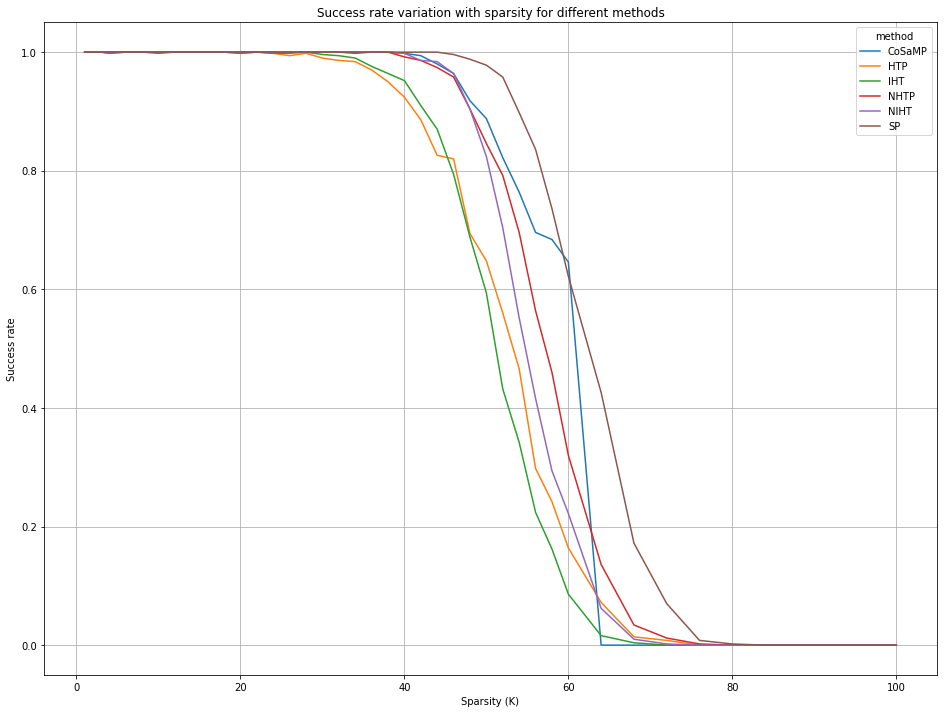

In [5]:
df2 = df.loc[: , ["method", "k", "success_rate"]]
df3 = df2.pivot(index="k", columns="method", values="success_rate")
title = f"Success rate variation with sparsity for different methods"
ax = df3.plot(title=title, figsize=(16,12))
ax.set_xlabel("Sparsity (K)")
ax.set_ylabel("Success rate")
ax.grid()

## Comparison of minimum iterations

Different algorithms tend to take different numbers of iterations (at the minimum) to complete sparse recovery. Extremely simple algorithms like IHT take a large number of iterations to converge. Algorithms which involve a least squares step on the current estimate of support tend to converge much faster. When an algorithm fails in successful recovery, there are two possibilities. It may either converge to a wrong solution. Or it may keep on periodicially oscillating over a set of wrong solutions. HTP and NHTP converge to a wrong solution. CoSaMP and SP keep on oscillating. In their case, the algorithm breaks after a maximum number of iterations which is set to 200 in our experiments.

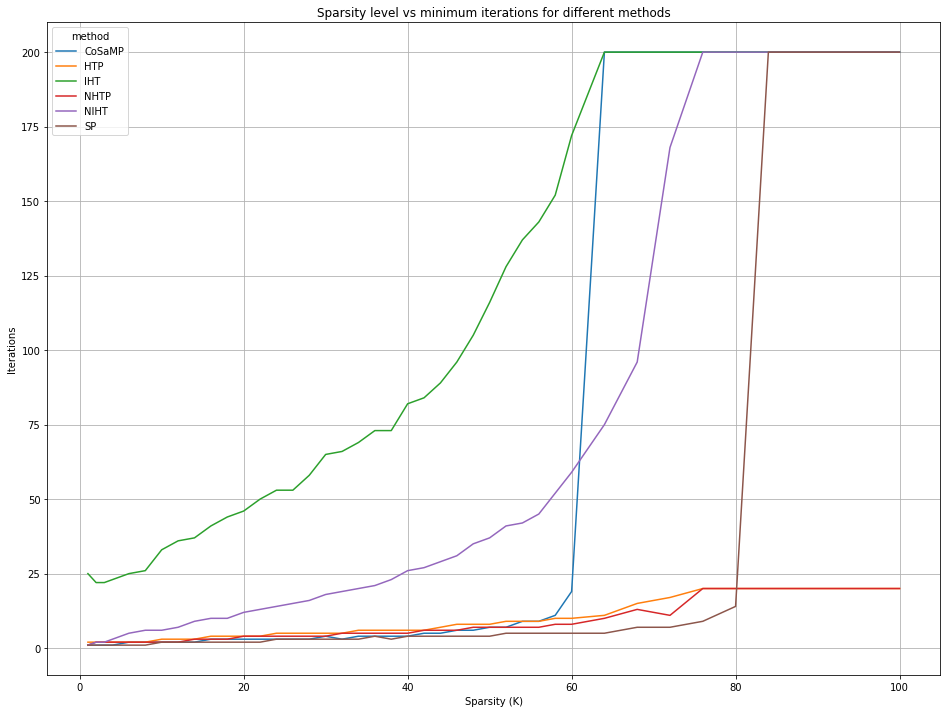

In [6]:
df2 = df.loc[: , ["method", "k", "min_iters"]]
df3 = df2.pivot(index="k", columns="method", values="min_iters")
title = f"Sparsity level vs minimum iterations for different methods"
ax = df3.plot(title=title, figsize=(16,12))
ax.set_xlabel("Sparsity (K)")
ax.set_ylabel("Iterations")
ax.grid()

## Comparison of average iterations

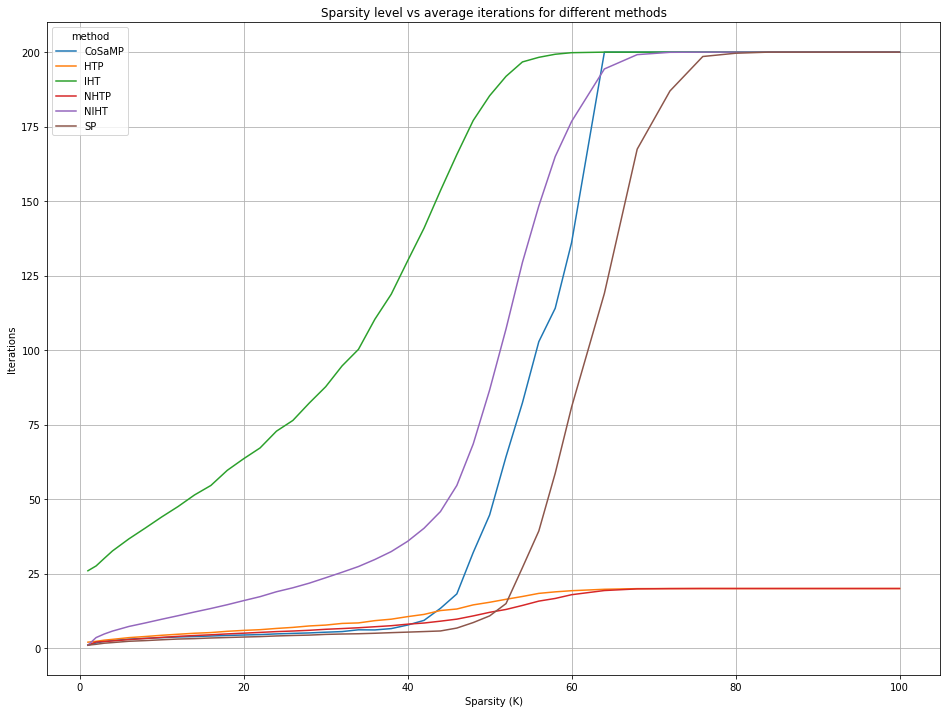

In [7]:
df2 = df.loc[: , ["method", "k", "mean_iters"]]
df3 = df2.pivot(index="k", columns="method", values="mean_iters")
title = f"Sparsity level vs average iterations for different methods"
ax = df3.plot(title=title, figsize=(16,12))
ax.set_xlabel("Sparsity (K)")
ax.set_ylabel("Iterations")
ax.grid()

## Comparison of maximum iterations

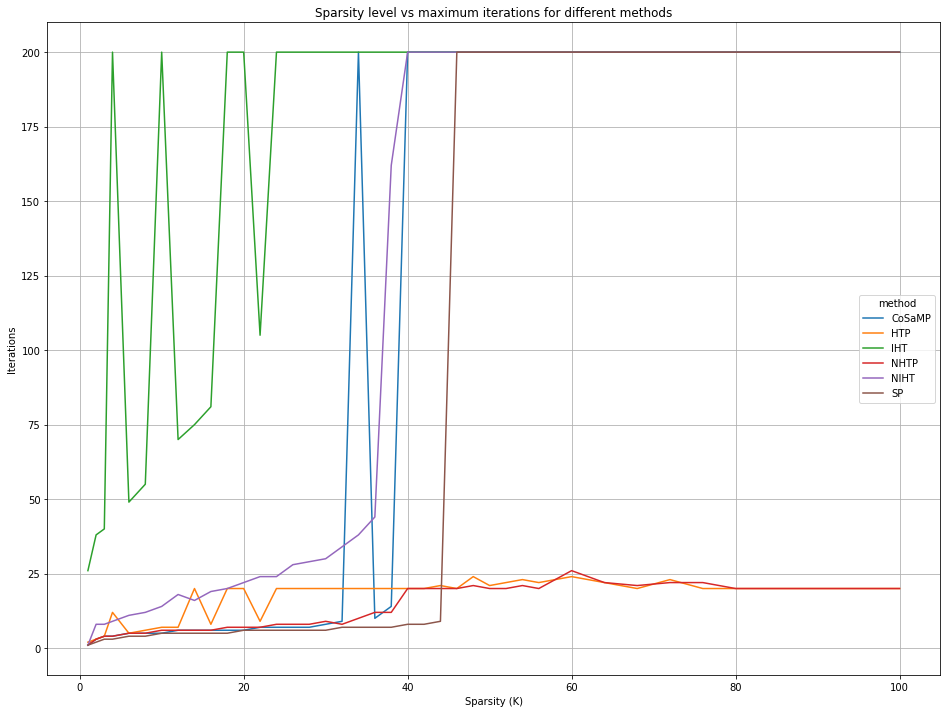

In [8]:
df2 = df.loc[: , ["method", "k", "max_iters"]]
df3 = df2.pivot(index="k", columns="method", values="max_iters")
title = f"Sparsity level vs maximum iterations for different methods"
ax = df3.plot(title=title, figsize=(16,12))
ax.set_xlabel("Sparsity (K)")
ax.set_ylabel("Iterations")
ax.grid()

## Comparison of average runtime

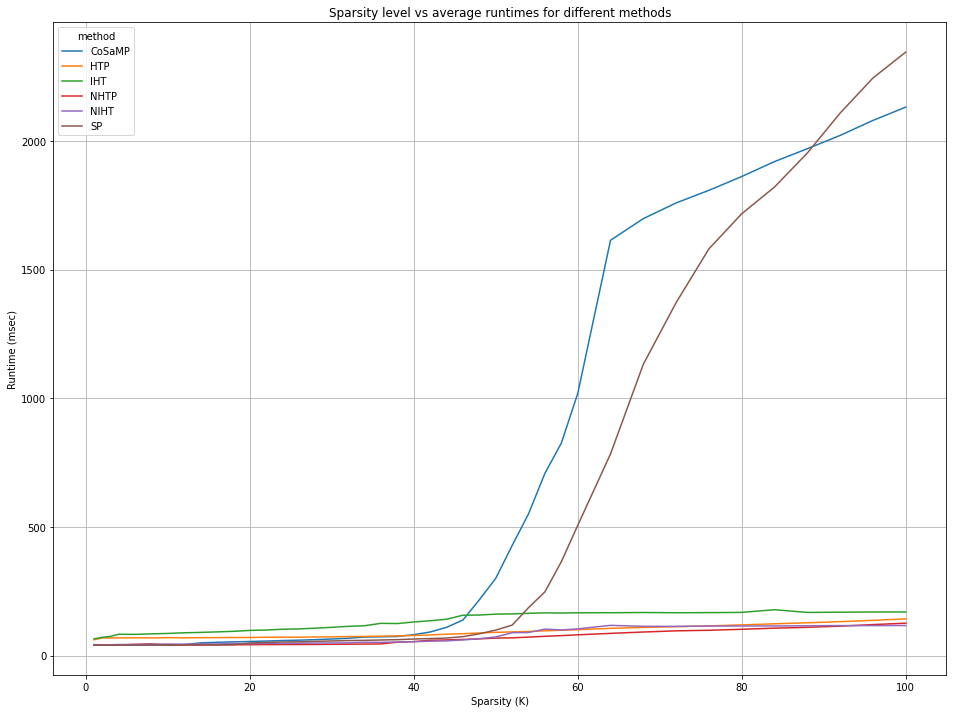

In [9]:
df2 = df.loc[: , ["method", "k", "mean_runtime"]]
df3 = df2.pivot(index="k", columns="method", values="mean_runtime")
title = f"Sparsity level vs average runtimes for different methods"
ax = df3.plot(title=title, figsize=(16,12))
ax.set_xlabel("Sparsity (K)")
ax.set_ylabel("Runtime (msec)")
ax.grid()

###### A helper routines to plot variation of various metrics with sparsity levels for a specific recovery method

In [10]:
def plot_success_rate(df, method):
    title = f"Variation of success rate with sparsity for {method}"
    ax = df.plot(figsize=(16, 12), x="k", y="success_rate", label="Success rate", title=title)
    ax.set_xlabel("Sparsity (K)")
    ax.set_ylabel("Success rate")
    ax.grid()

In [11]:
def plot_iterations(df, method):
    fig_params = dict(figsize=(16,12), facecolor='w', edgecolor='k')
    fig, ax =plt.subplots(**fig_params)
    title = f"Variation of iterations with sparsity for {method}"
    ax.plot(df['k'], df['min_iters'], label="Minimum iterations")
    ax.plot(df['k'], df['max_iters'], label="Maximum iterations")
    ax.plot(df['k'], df['mean_iters'], label="Mean iterations")
    ax.set_xlabel("Sparsity (K)")
    ax.set_ylabel("Iterations")
    ax.set_title(title)
    ax.grid()
    ax.legend()

In [12]:
def plot_average_runtime(df, method):
    title = f"Variation of average runtime with sparsity for {method}"
    ax = df.plot(figsize=(16, 12), x="k", y="mean_runtime", label="Average runtime", title=title)
    ax.set_xlabel("Sparsity (K)")
    ax.set_ylabel("Runtime (msec)")
    ax.grid()

# Iterative Hard Thresholding

Select the rows corresponding to this method

In [13]:
iht = df[df.method == 'IHT']

In [14]:
iht.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
0,IHT,200,1000,1,500,500,0,1.000,25,26,25.960,32.508725,65.147745
1,IHT,200,1000,2,500,500,0,1.000,22,38,27.582,35.517057,71.176467
2,IHT,200,1000,3,500,500,0,1.000,22,40,30.128,37.174088,74.497169
3,IHT,200,1000,4,500,499,1,0.998,23,200,32.620,41.390594,82.947083
4,IHT,200,1000,6,500,500,0,1.000,25,49,36.666,41.159137,82.483240


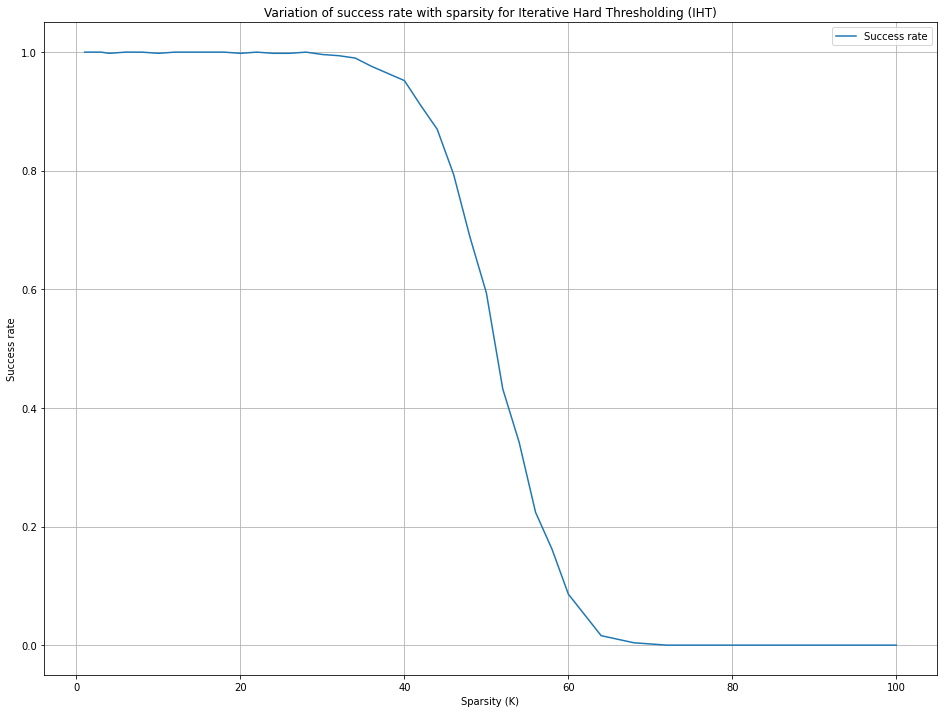

In [15]:
method = 'Iterative Hard Thresholding (IHT)'
plot_success_rate(iht, method)

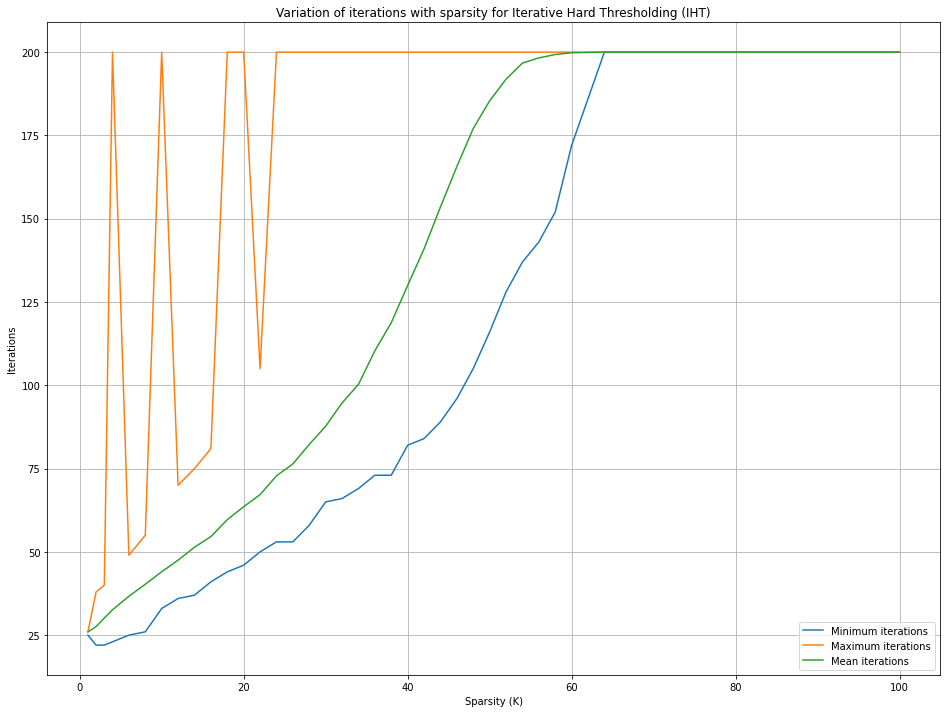

In [16]:
plot_iterations(iht, method)

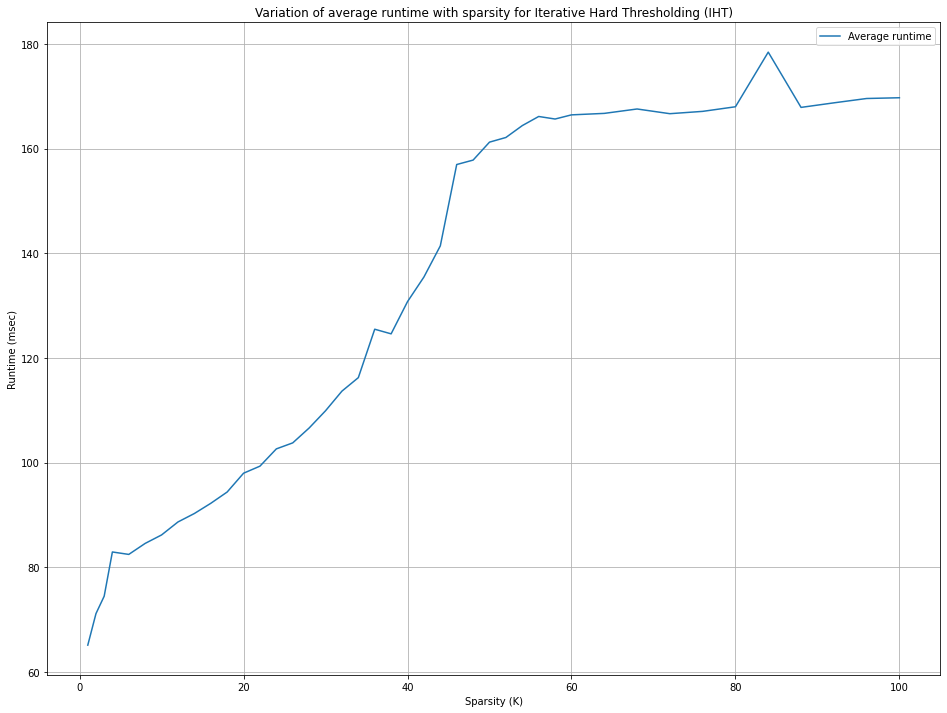

In [17]:
plot_average_runtime(iht, method)

# Normalized Iterative Hard Thresholding

In [18]:
niht = df[df.method == 'NIHT']

In [19]:
niht.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
42,NIHT,200,1000,1,500,500,0,1.0,1,1,1.000,21.403815,42.893416
43,NIHT,200,1000,2,500,500,0,1.0,2,8,3.544,20.801906,41.687187
44,NIHT,200,1000,3,500,500,0,1.0,2,8,4.750,21.129919,42.344527
45,NIHT,200,1000,4,500,500,0,1.0,3,9,5.722,21.511855,43.109929
46,NIHT,200,1000,6,500,500,0,1.0,5,11,7.270,21.643060,43.372866


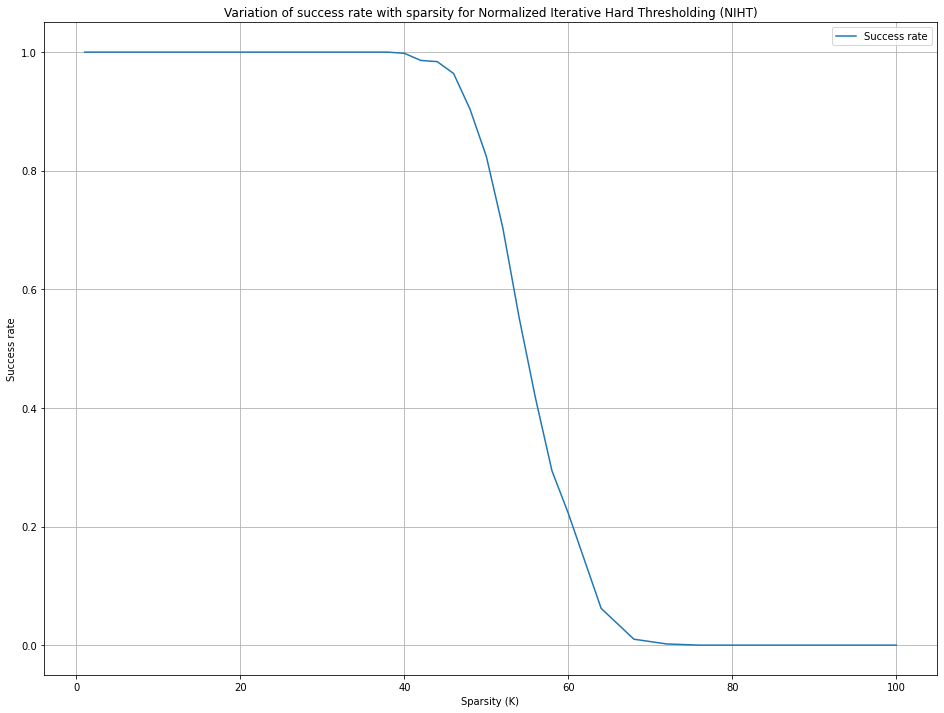

In [20]:
method = 'Normalized Iterative Hard Thresholding (NIHT)'
plot_success_rate(niht, method)

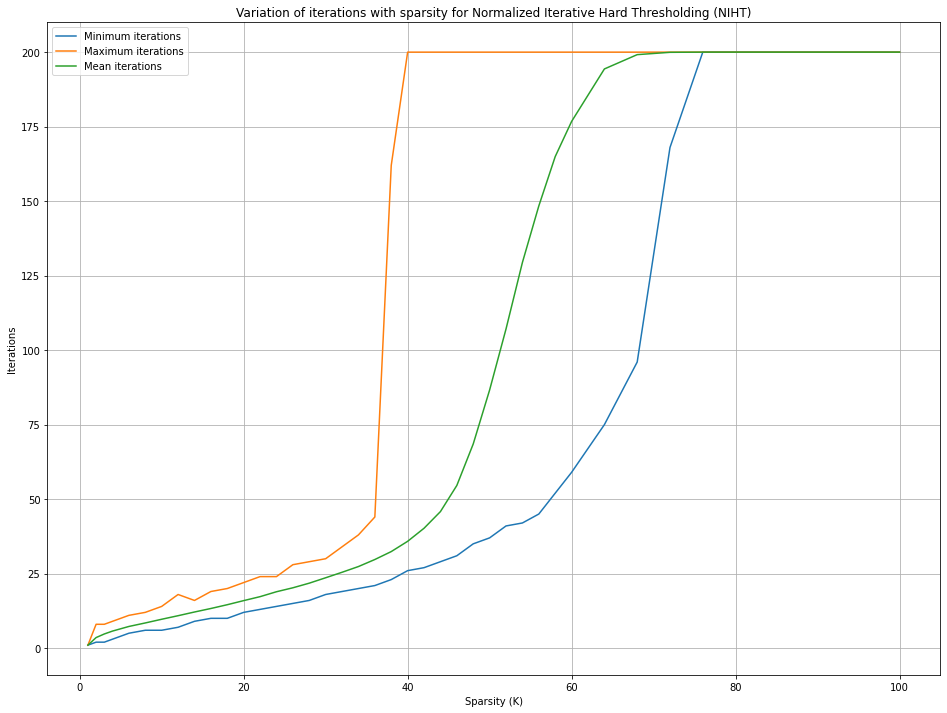

In [21]:
plot_iterations(niht, method)

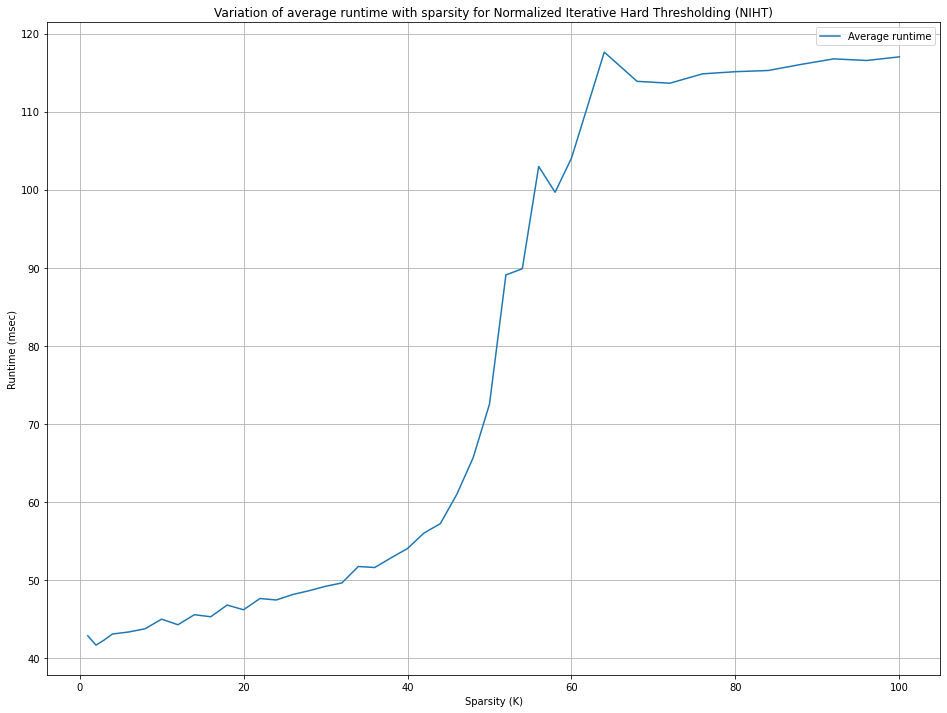

In [22]:
plot_average_runtime(niht, method)

# Hard Thresholding Pursuit

Select the rows corresponding to this method

In [23]:
htp = df[df.method == 'HTP']

In [24]:
htp.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
84,HTP,200,1000,1,500,500,0,1.000,2,2,2.000,30.710383,61.543855
85,HTP,200,1000,2,500,500,0,1.000,2,3,2.288,34.279130,68.695650
86,HTP,200,1000,3,500,500,0,1.000,2,4,2.676,34.173494,68.483957
87,HTP,200,1000,4,500,499,1,0.998,2,12,2.940,34.356518,68.850738
88,HTP,200,1000,6,500,500,0,1.000,2,5,3.522,34.572081,69.282728


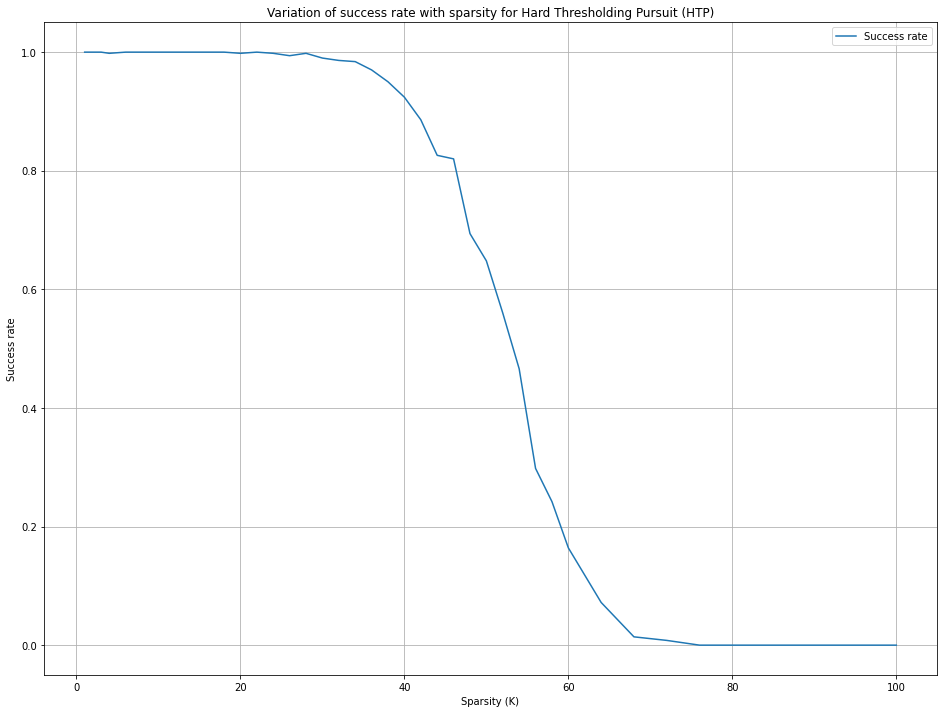

In [25]:
method = 'Hard Thresholding Pursuit (HTP)'
plot_success_rate(htp, method)

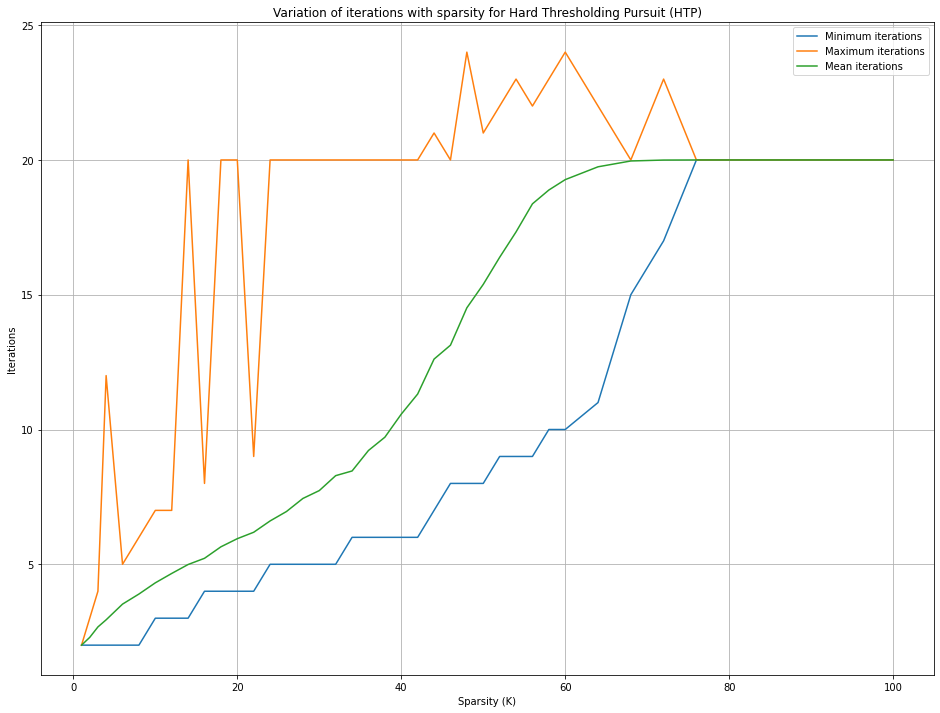

In [26]:
plot_iterations(htp, method)

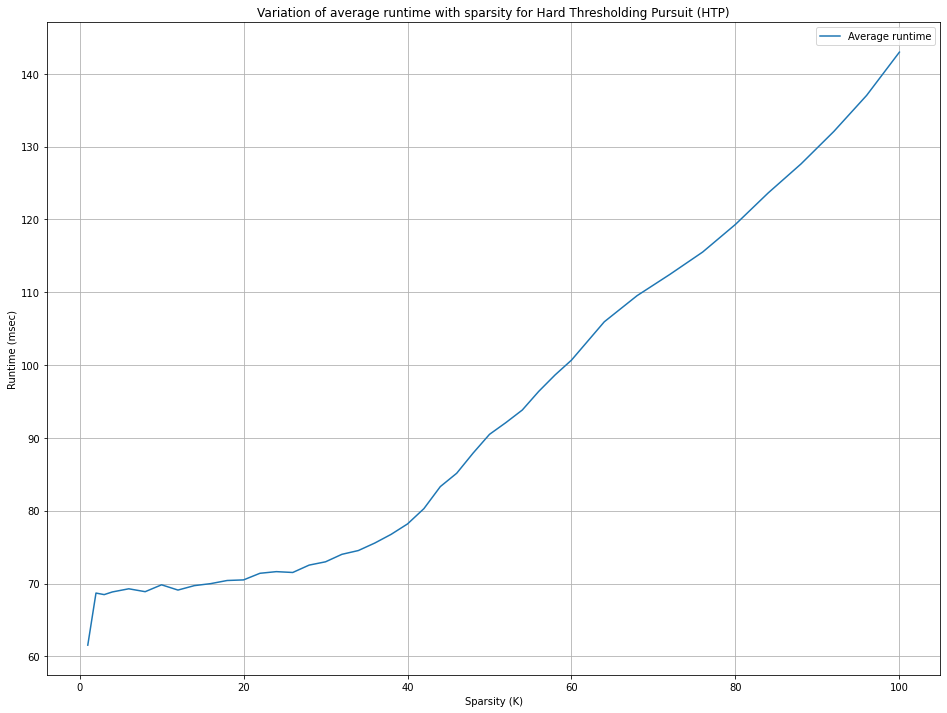

In [27]:
plot_average_runtime(htp, method)

# Normalized Hard Thresholding Pursuit

Select the rows corresponding to this method

In [28]:
nhtp = df[df.method == 'NHTP']

In [29]:
nhtp.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
126,NHTP,200,1000,1,500,500,0,1.0,1,1,1.000,20.725119,41.533305
127,NHTP,200,1000,2,500,500,0,1.0,2,3,2.070,20.467177,41.016387
128,NHTP,200,1000,3,500,500,0,1.0,2,4,2.212,20.436282,40.954473
129,NHTP,200,1000,4,500,500,0,1.0,2,4,2.398,20.544239,41.170820
130,NHTP,200,1000,6,500,500,0,1.0,2,5,2.862,21.702943,43.492871


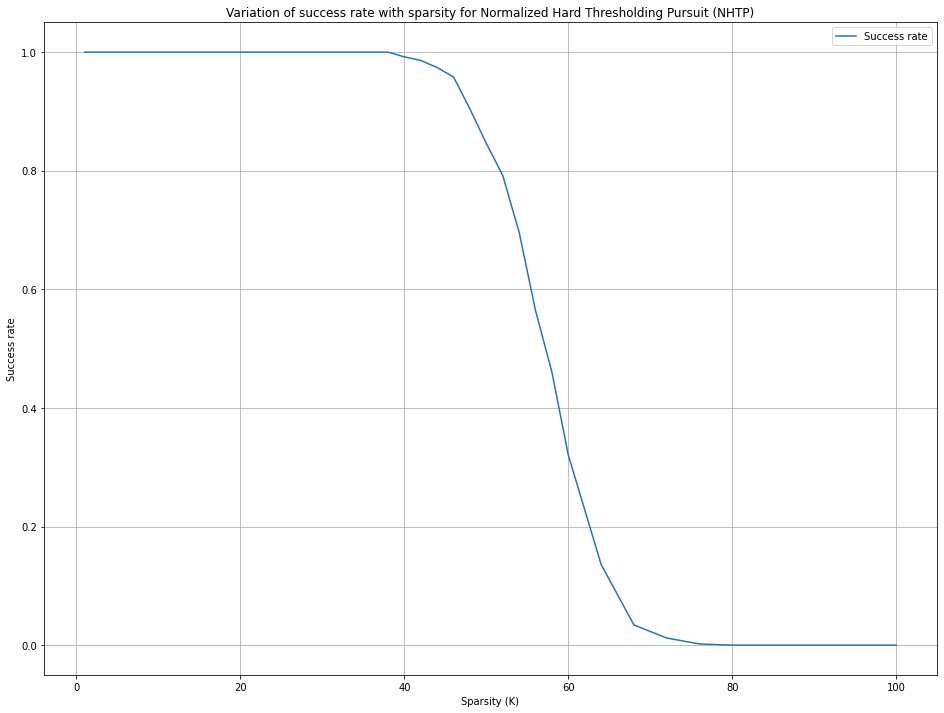

In [30]:
method = 'Normalized Hard Thresholding Pursuit (NHTP)'
plot_success_rate(nhtp, method)

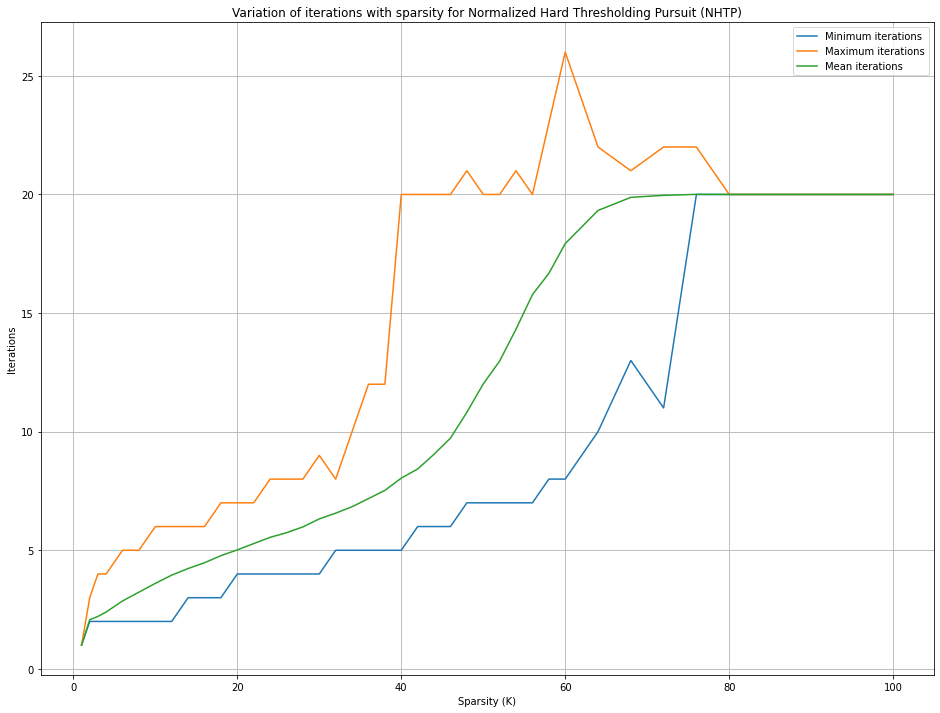

In [31]:
plot_iterations(nhtp, method)

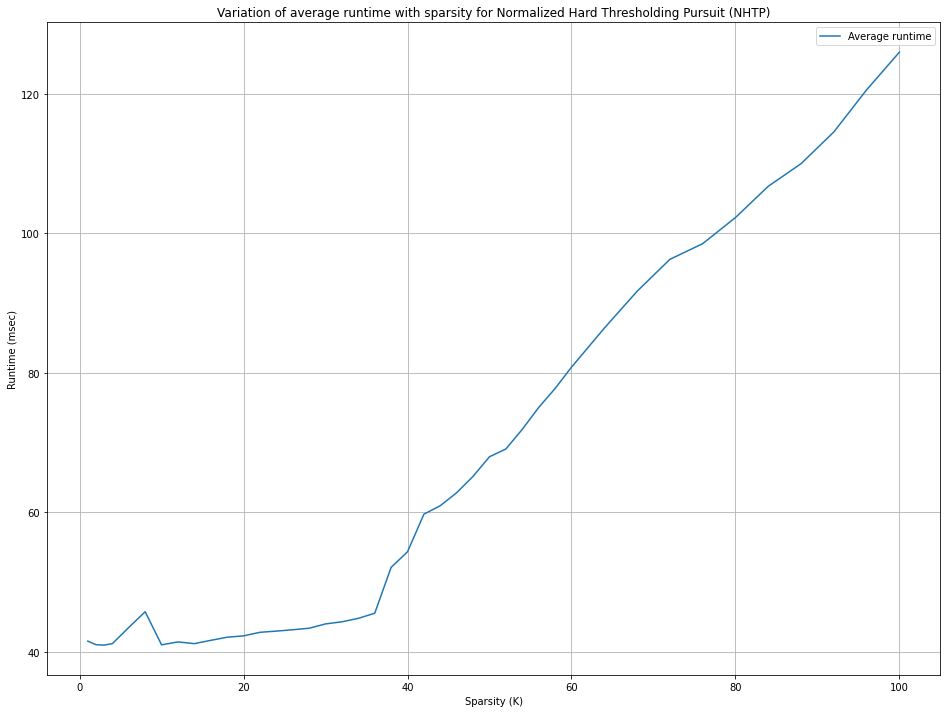

In [32]:
plot_average_runtime(nhtp, method)

# Subspace Pursuit

Select the rows corresponding to this method

In [33]:
sp = df[df.method == 'SP']

In [34]:
sp.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
168,SP,200,1000,1,500,500,0,1.0,1,1,1.000,20.549232,41.180826
169,SP,200,1000,2,500,500,0,1.0,1,2,1.288,20.291889,40.665109
170,SP,200,1000,3,500,500,0,1.0,1,3,1.658,20.352208,40.785988
171,SP,200,1000,4,500,500,0,1.0,1,3,1.862,20.378519,40.838716
172,SP,200,1000,6,500,500,0,1.0,1,4,2.300,20.398715,40.879189


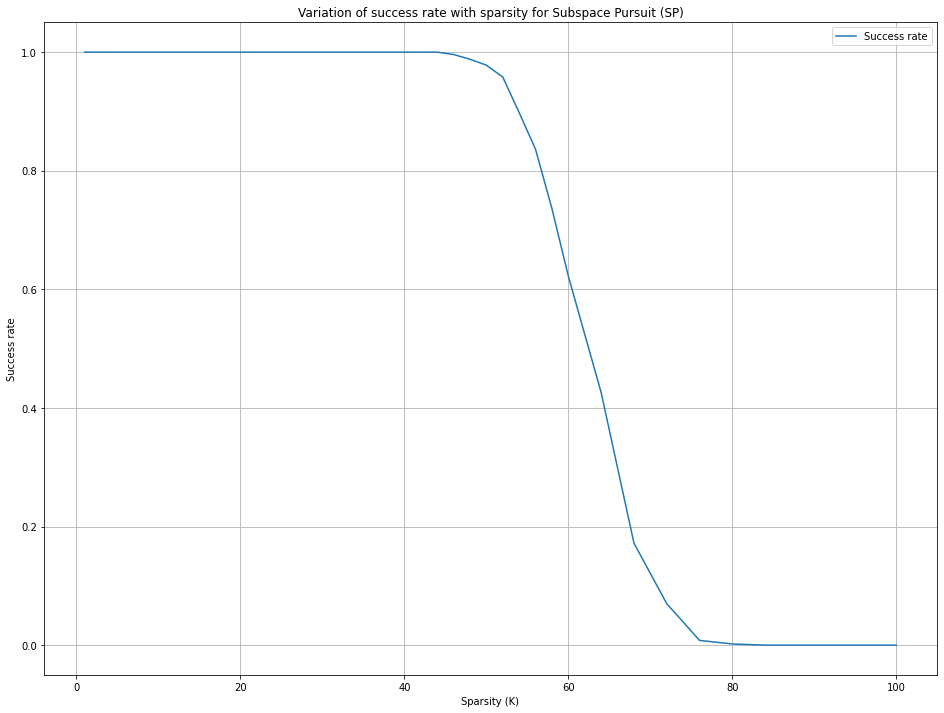

In [35]:
method = 'Subspace Pursuit (SP)'
plot_success_rate(sp, method)

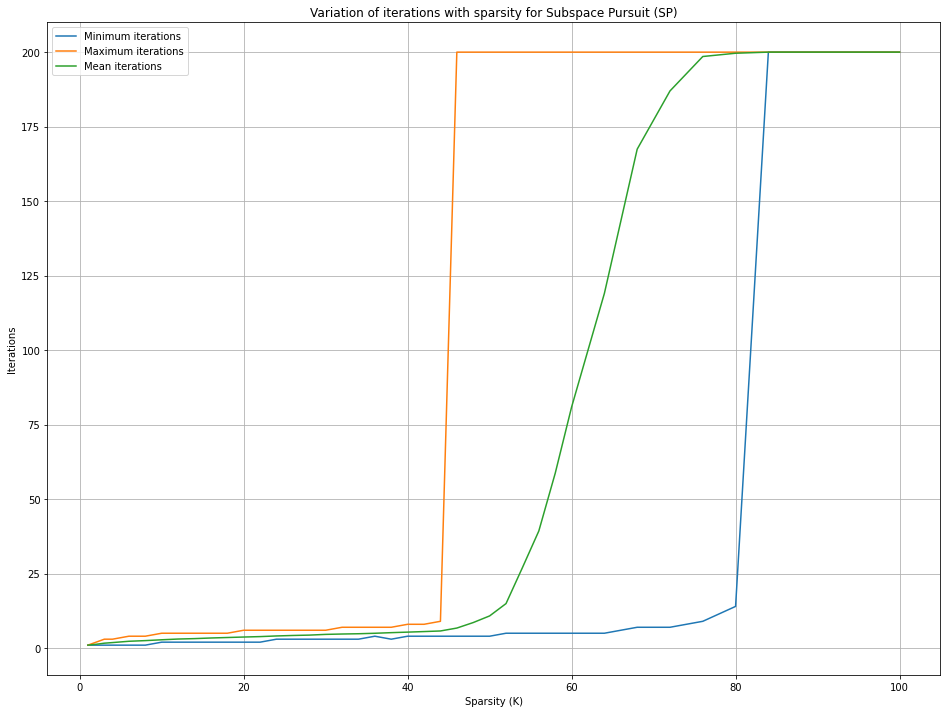

In [36]:
plot_iterations(sp, method)

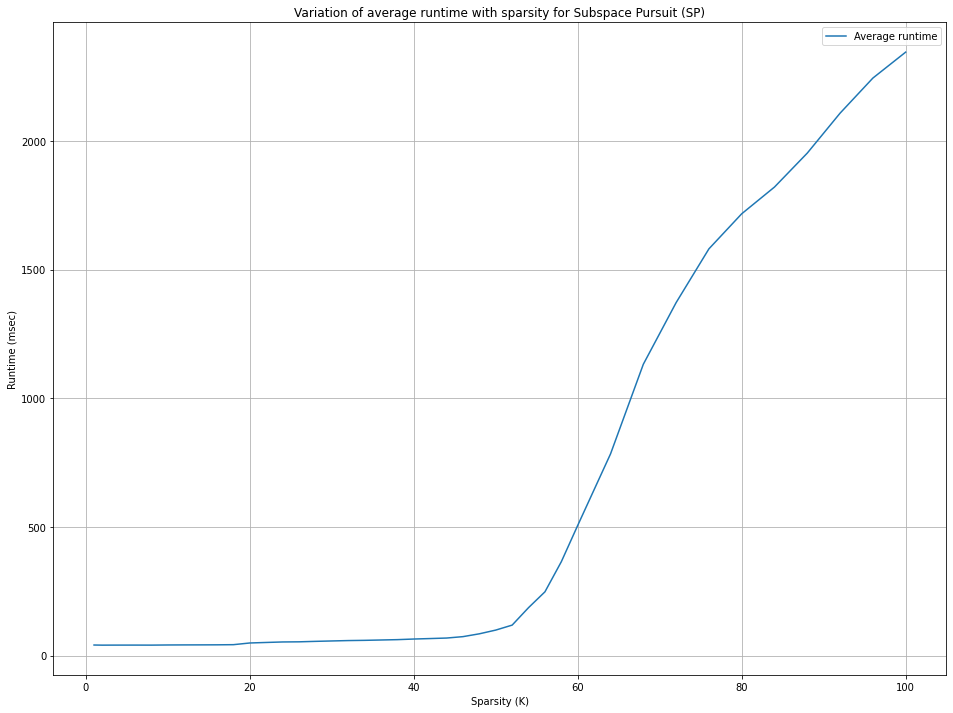

In [37]:
plot_average_runtime(sp, method)

# Compressive Sampling Matching Pursuit

Select the rows corresponding to this method

In [38]:
cosamp = df[df.method == 'CoSaMP']

In [39]:
cosamp.head()

,method,m,n,k,trials,successes,failures,success_rate,min_iters,max_iters,mean_iters,runtime,mean_runtime
210,CoSaMP,200,1000,1,500,500,0,1.0,1,1,1.000,20.500777,41.083722
211,CoSaMP,200,1000,2,500,500,0,1.0,1,3,1.714,20.437221,40.956355
212,CoSaMP,200,1000,3,500,500,0,1.0,1,4,2.270,20.436329,40.954568
213,CoSaMP,200,1000,4,500,500,0,1.0,1,4,2.578,20.425126,40.932116
214,CoSaMP,200,1000,6,500,500,0,1.0,2,5,3.028,20.480068,41.042220


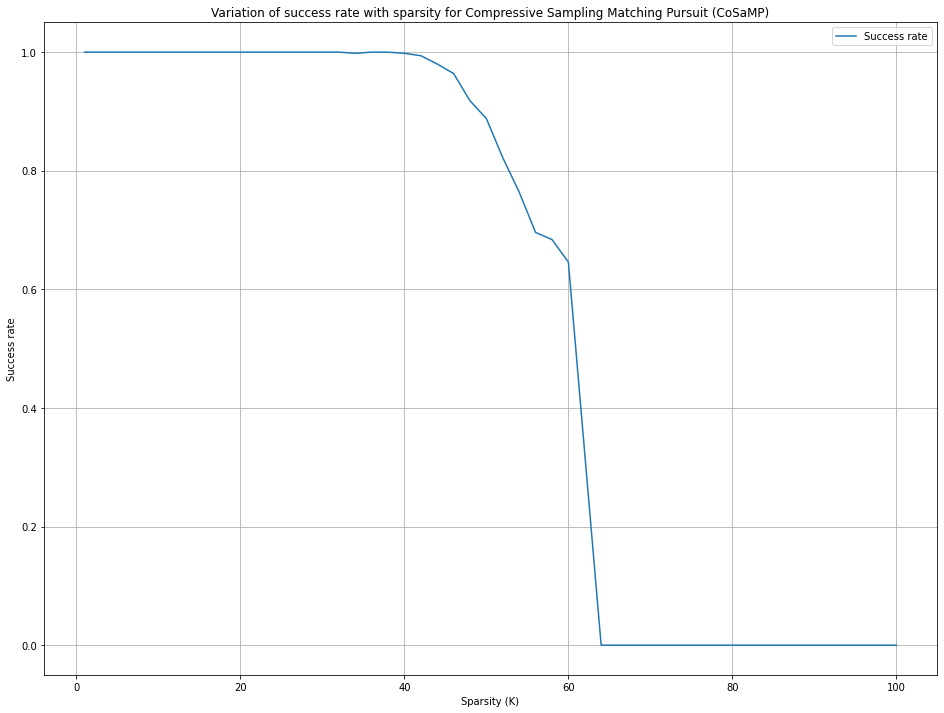

In [40]:
method = 'Compressive Sampling Matching Pursuit (CoSaMP)'
plot_success_rate(cosamp, method)

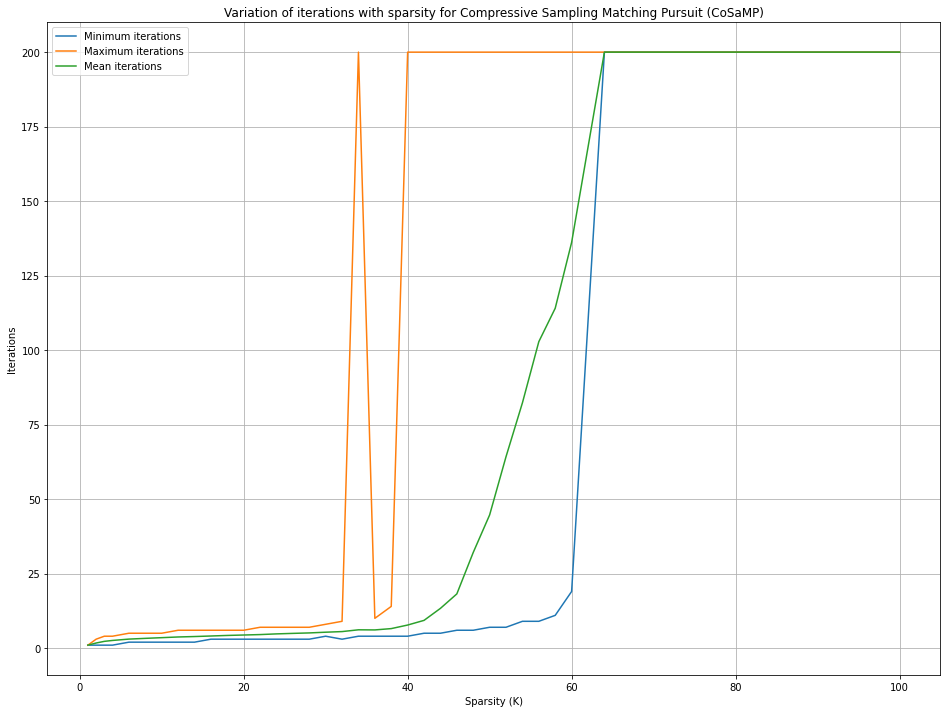

In [41]:
plot_iterations(cosamp, method)

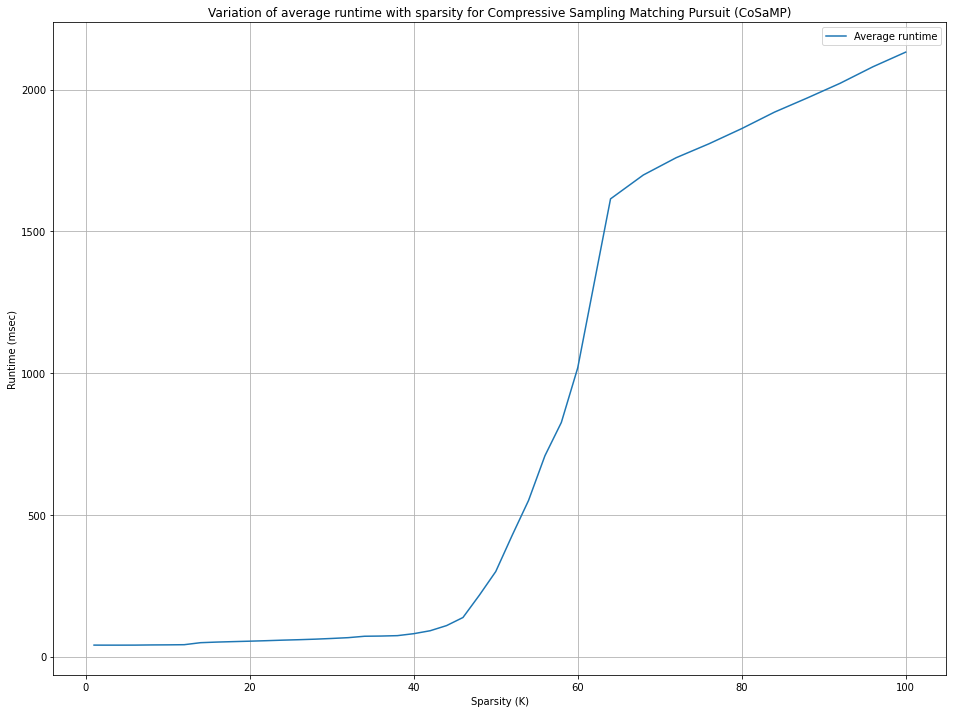

In [42]:
plot_average_runtime(cosamp, method)